../src/Like.py:33: RuntimeWarning: invalid value encountered in greater
  Exmin = amin(Ex[Ex>0])
../src/Like.py:58: RuntimeWarning: invalid value encountered in less
  DY[DY<2] = 2


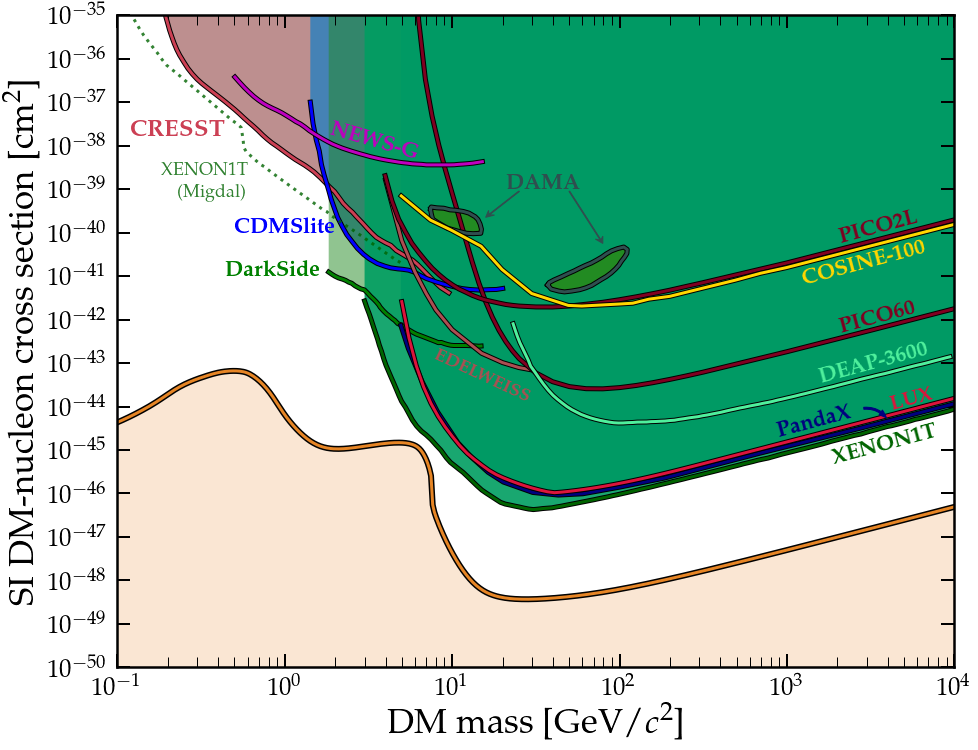

In [39]:
import sys
sys.path.append('../src')
from numpy import *
import matplotlib.pyplot as plt
from Like import *
from PlotFuncs import *

alph = 0.7
nufloor_col = '#e68525'
pek = line_background(6,'k')

def MakeLimitPlot_SI(Annotations=True,Collected=False,\
                     xmin=0.1,xmax=1.0e4,ymax=1.0e-36,ymin=1.0e-51,\
                     facecolor=[0.0, 0.62, 0.38],edgecolor='darkgreen',edgecolor_collected='darkgray',\
                     alph=0.5,lfs=35,tfs=25,\
                     xlab=r"DM mass [GeV$/c^2$]",ylab=r"SI DM-nucleon cross section [cm$^2$]"):
    pek = line_background(5,'k')

    fig,ax = MySquarePlot(xlab,ylab,lfs=lfs,tfs=tfs,size_x=15)


    if Collected:
        AllLimits = loadtxt("../data/WIMPLimits/SI/AllLimits-2021.txt")
        plt.fill_between(AllLimits[:,0], AllLimits[:,1],edgecolor=None,y2=ymax,facecolor=facecolor,alpha=alph,zorder=0)
        plt.plot(AllLimits[:,0], AllLimits[:,1],color=edgecolor_collected,linewidth=3,alpha=alph,zorder=0.01)
        for lim in ['CRESST','CDMSLite','DarkSide','PandaX','Xenon1T','LUX','DEAP-3600','EDELWEISS','PICO60','PICO2L','COSINE-100','NEWS-G']:
            dat = loadtxt("../data/WIMPLimits/SI/"+lim+".txt")
            plt.plot(dat[:,0], dat[:,1],color=edgecolor,linewidth=3,alpha=alph,zorder=0)

        DAMA1 = loadtxt("../data/WIMPLimits/SI/DAMA1.txt")
        DAMA2 = loadtxt("../data/WIMPLimits/SI/DAMA2.txt")
        plt.plot(DAMA1[:,0], DAMA1[:,1],color=edgecolor,linewidth=3,alpha=alph,zorder=0)
        plt.plot(DAMA2[:,0], DAMA2[:,1],color=edgecolor,linewidth=3,alpha=alph,zorder=0)

    else:
        if Annotations:
            plt.text(0.12,1.7e-38,r"{\bf CRESST}",color=[0.8, 0.25, 0.33],fontsize=24,rotation=0)
            plt.text(0.5,1.0e-40,r"{\bf CDMSlite}",color="blue",fontsize=22,rotation=0)
            plt.text(1.65,1e-41,r"{\bf DarkSide}",color="green",fontsize=22,rotation=0,ha='right')
            plt.text(850.0,2.e-45,r"{\bf PandaX}",color="navy",fontsize=22,rotation=15)
            plt.text(1800.0,0.5e-45,r"{\bf XENON1T}",color="darkgreen",fontsize=22,rotation=15)
            plt.text(7.5,1.3e-44,r"{\bf EDELWEISS}",color=[0.67, 0.31, 0.32],fontsize=18,rotation=-25)
            plt.text(2000.0,5.4e-43,r"{\bf PICO60}",color=[0.5, 0.0, 0.13],fontsize=22,rotation=15)
            plt.text(2000.0,5.9e-41,r"{\bf PICO2L}",color=[0.5, 0.0, 0.13],fontsize=22,rotation=15)
            plt.text(21.0,1e-39,r"{\bf DAMA}",color='darkslategray',fontsize=22)
            plt.text(1200.0,0.65e-41,r"{\bf COSINE-100}",color="gold",fontsize=22,rotation=15)
            plt.text(1.5e3,3.5e-44,r'{\bf DEAP-3600}',color='#4ff09d',fontsize=22,rotation=15)
            plt.text(4000.0,8.7e-45,r"{\bf LUX}",color="crimson",fontsize=21,rotation=15)
            plt.text(0.6,0.7e-39,'XENON1T \n (Migdal)',alpha=0.8,color='darkgreen',fontsize=18,ha='right')
            plt.text(1.8,0.5e-38,r"{\bf NEWS-G}",color="m",fontsize=22,rotation=-16)

            plt.arrow(0.48, 0.73, -0.04, -0.04, transform=ax.transAxes,
                  length_includes_head=True,
                  head_width=0.01, head_length=0.01, overhang=0.4,
                  edgecolor='darkslategray',facecolor='darkslategray')
            plt.arrow(0.54, 0.73, 0.04, -0.08, transform=ax.transAxes,
                  length_includes_head=True,
                  head_width=0.01, head_length=0.01, overhang=0.4,
                  edgecolor='darkslategray',facecolor='darkslategray')
            CurvedArrow(2.8e3,4e3,0.9e-44,0.5e-44,alpha=1,color='navy',connectionstyle="arc3,rad=-0.3",\
            style = "Simple, tail_width=2, head_width=6, head_length=8")

        SILimits(ax,facecolor=facecolor,edgecolor=edgecolor,alph=alph)

    # Labels
    plt.yscale('log')
    plt.xscale('log')
    plt.yticks(10.0**arange(-51,-30,1),fontsize=25)
    ax.tick_params(which='major',pad=10)
    ax.set_xlim(left=xmin, right=xmax)
    ax.set_ylim(bottom=ymin, top=ymax)
    return fig,ax

fig,ax = MakeLimitPlot_SI(Annotations=True,Collected=False,ymin=1.0e-50,ymax=1e-35)

# This work
data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloorXe_detailed_SI.txt')
m,sig,NUFLOOR,DY = Floor_2D(data)
plt.fill_between(m,NUFLOOR,y2=1e-99,color=nufloor_col,alpha=0.2)
plt.plot(m,NUFLOOR,color=nufloor_col,lw=3,label='This work',path_effects=pek)

#plt.gcf().text(0.65,0.2,r'{\bf Neutrino floor}',color='orange',rotation=16,fontsize=30)

MySaveFig(fig,'SI_plot')